<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-the-stocks" data-toc-modified-id="Loading-the-stocks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the stocks</a></span></li><li><span><a href="#Getting-the-AI-started" data-toc-modified-id="Getting-the-AI-started-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting the AI started</a></span><ul class="toc-item"><li><span><a href="#Regression" data-toc-modified-id="Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Regression</a></span></li></ul></li></ul></div>

# AI Part

In [1]:
# cell for autoreload includes
%load_ext autoreload
%autoreload 2

## Loading the stocks

In [2]:
from src.stocks import Stocks
# The warnings are due to the includes in the file

22/06/20 13:16:46 WARN Utils: Your hostname, Mathieus-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 172.27.99.57 instead (on interface feth4588)
22/06/20 13:16:46 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/06/20 13:16:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


We define the schema of the datas contained in files

In [3]:
from pyspark.sql.types import DoubleType, StringType, DateType, StructType, StructField

In [4]:
data_schema = StructType([
    StructField('Date', DateType(), True),
    StructField('High', DoubleType(), True),
    StructField('Low', DoubleType(), True),
    StructField('Open', DoubleType(), True),
    StructField('Close', DoubleType(), True),
    StructField('Volume', DoubleType(), True),
    StructField('Adj Close', DoubleType(), True),
    StructField('company_name', StringType(), True)
])

We load all the stocks:

In [5]:
stocks = Stocks(header=True, delimiter=',', schema=data_schema)

We show an exemple of stock with all the indicators:

In [6]:
stocks.stocks[0].predict.fullDF.show(4)

22/06/20 13:16:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:16:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+-----------------+-----------------+-----------------+-----------------+---------+-----------------+-----------------+------------------+------------------+---------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+-------------------+--------------------+----------------+
|      Date|             High|              Low|             Open|            Close|   Volume|        Adj Close|       next_Close|               CCI|               roc|       momentum|    R_de_williams|            BB_MM|            BB_UB|            BB_LB|            KB_MM|            KB_UB|            KB_LB|               DPO|                BOF|moving_average_Close|daily_return_day|
+----------+-----------------+-----------------+-----------------+-----------------+---------+-----------------+-----------------+------------------+------------------+---------------+-----------------+-----------------+----

## Linear Regression

Using our estimators, we predict the next value of "Close":

In [7]:
stocks.call_prediction_function("print_linear_regression")

############################
########## GOOGLE ##########
############################



22/06/20 13:17:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:00 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
22/06/20 13:17:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradat

+-----------------+-----------------+
|       next_Close|  pred_next_Close|
+-----------------+-----------------+
|806.6500244140625|807.8430982498076|
|807.8800048828125|806.3739733724325|
|806.0700073242188|805.1338125966574|
|835.6699829101562|825.4367210579323|
| 798.530029296875|793.7026347465677|
|808.3800048828125|810.1746195117835|
|824.1599731445312|823.1238066717457|
| 829.280029296875|829.4267489502611|
|845.5399780273438| 846.163784846847|
|845.6199951171875|850.8732425051757|
|847.2000122070312|848.5523051277712|
|852.1199951171875|851.2101512465334|
|830.4600219726562|849.5265128515838|
| 819.510009765625|815.2964450491949|
|831.4099731445312|835.0947998603859|
|837.1699829101562|826.3187254502521|
|           874.25|870.3738888645423|
|964.8599853515625|975.4837601946898|
| 939.780029296875|941.9735475684465|
|957.0900268554688|960.3546513334791|
+-----------------+-----------------+
only showing top 20 rows

##############################
########## FACEBOOK ##########


22/06/20 13:17:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 1

+------------------+------------------+
|        next_Close|   pred_next_Close|
+------------------+------------------+
| 124.9000015258789| 122.8954951559345|
|128.33999633789062|126.38565606633506|
|127.91999816894531|127.80451739283177|
|131.47999572753906| 129.8709224708016|
|130.83999633789062| 132.6046308807576|
| 134.1999969482422|132.29516327457026|
|133.83999633789062|133.82102159208694|
|136.41000366210938|135.65004670445455|
|139.60000610351562|  138.630353891271|
|139.32000732421875|139.63136566915418|
|139.72000122070312| 139.1615012017934|
|139.83999633789062| 139.9899752948469|
|138.50999450683594|140.02862545986173|
|140.32000732421875|140.63952920913982|
|141.85000610351562| 141.7128050024281|
| 141.4199981689453|140.04223839088667|
| 147.6999969482422|146.80166244727357|
| 151.4600067138672|152.71279216094945|
|150.63999938964844|149.56740655315997|
|153.39999389648438| 153.9967286030182|
+------------------+------------------+
only showing top 20 rows

##############

22/06/20 13:17:12 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 1

+------------------+------------------+
|        next_Close|   pred_next_Close|
+------------------+------------------+
| 796.9199829101562| 797.3067651937115|
| 817.1400146484375|  814.738037887736|
|   807.47998046875| 809.9130208428454|
|   836.52001953125| 825.4295897928931|
| 839.9500122070312| 834.0535473607714|
| 819.7100219726562|  811.475343582251|
| 844.1400146484375| 843.9883140982006|
| 848.6400146484375|  843.128736238474|
| 854.5900268554688| 858.9516723939237|
|  852.530029296875| 862.1245864140702|
|  852.969970703125| 854.7168533123529|
| 852.3099975585938| 857.4689339109334|
| 843.2000122070312| 863.8221994192086|
| 846.8200073242188| 843.3132089152612|
|  909.280029296875| 910.5130354263501|
|  901.989990234375| 887.1805085520328|
| 918.3800048828125| 921.2160836839687|
| 994.6199951171875|1003.1640950728308|
| 987.7100219726562| 965.6309294141847|
|1001.2999877929688|1009.1077894319012|
+------------------+------------------+
only showing top 20 rows

##############

22/06/20 13:17:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 1

+------------------+------------------+
|        next_Close|   pred_next_Close|
+------------------+------------------+
|29.747499465942383|29.321471646082532|
|29.760000228881836|29.622618550283796|
|29.997499465942383|29.966365518466013|
|30.469999313354492|29.968565067227136|
| 32.13249969482422| 33.25452653664545|
|  33.0099983215332| 32.95573239199335|
|33.837501525878906|33.908665357446445|
| 34.23249816894531| 34.08443272217466|
| 34.79999923706055|  34.7245077159544|
|34.747501373291016| 34.82571709757524|
|  35.1150016784668| 34.64839036930559|
|34.997501373291016| 35.17773613707086|
|34.959999084472656| 35.39937971653686|
|35.220001220703125| 35.06668666161459|
|36.005001068115234|36.174413068953875|
| 35.45750045776367| 35.20234701831507|
|  35.9474983215332|35.873883504199725|
|38.189998626708984| 38.54213767052195|
|35.567501068115234|  35.9288614023933|
|36.407501220703125|36.200289406000365|
+------------------+------------------+
only showing top 20 rows

##############

22/06/20 13:17:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 1

+------------------+------------------+
|        next_Close|   pred_next_Close|
+------------------+------------------+
| 46.25600051879883| 44.87139755104439|
| 47.54999923706055| 45.15415627966565|
|47.672000885009766| 46.82194247001099|
| 50.89400100708008| 51.61124090027715|
|50.310001373291016| 50.34431224539928|
| 52.41600036621094|51.838654866658096|
|53.790000915527344| 56.59990553144708|
| 49.24599838256836| 50.63441247735247|
| 49.23400115966797|49.454599821781954|
|51.599998474121094| 49.92393164956482|
|51.145999908447266| 51.55688388114868|
| 52.29999923706055| 52.92155642588658|
| 50.13600158691406|53.148414755769096|
| 54.04399871826172| 52.98147233654025|
|              59.0| 62.02969016345001|
| 60.28799819946289|60.707201054436354|
| 61.72600173950195| 62.47850821085942|
|  68.2020034790039| 67.77025983363578|
| 74.27999877929688| 74.86701166671256|
| 76.52200317382812| 75.76984612496568|
+------------------+------------------+
only showing top 20 rows

##############

22/06/20 13:17:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 1

+-----------------+-----------------+
|       next_Close|  pred_next_Close|
+-----------------+-----------------+
|62.63999938964844| 63.0532625744447|
|62.70000076293945|62.74809638431432|
|             62.5|62.59976962917729|
|63.68000030517578|63.57943547944987|
|63.16999816894531|63.82405164759619|
|63.34000015258789|63.12904855258195|
| 64.5199966430664|64.90963828578833|
| 64.2300033569336|64.79083101685966|
|64.70999908447266| 65.3409051360339|
|64.41000366210938|65.31348710536395|
|            64.75|64.71059975776546|
|64.87000274658203|64.98813890212205|
|64.20999908447266|65.49740938533232|
| 65.0999984741211|65.41748704249078|
|65.55999755859375| 66.0306184336102|
| 65.4800033569336|65.40489727349151|
| 68.2699966430664|68.08092162241317|
|69.83999633789062|70.70199682750665|
|             70.0|69.93925630937898|
|70.26000213623047|70.57958151297741|
+-----------------+-----------------+
only showing top 20 rows

##########################
########## ZOOM ##########
########

22/06/20 13:17:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 1

+-----------------+------------------+
|       next_Close|   pred_next_Close|
+-----------------+------------------+
|             65.0|58.002162075956235|
|72.76000213623047|  72.3320626177623|
|79.18000030517578| 74.26785401969185|
|79.62999725341797| 75.47893389123234|
|84.66999816894531| 88.80230460081727|
|            76.25| 77.82676626690653|
|78.73999786376953| 73.05740206728657|
|102.7699966430664| 88.28680435030505|
|86.33000183105469| 85.73595547971298|
| 90.2699966430664| 87.18350646429853|
|88.79000091552734| 90.50861314855388|
|85.12999725341797|  88.9729123742742|
|91.87999725341797| 90.80295884766763|
| 91.4000015258789| 97.06130384240986|
|96.66999816894531| 91.86753279224415|
|95.51000213623047| 94.41679847920643|
|92.16000366210938| 94.32273011122928|
| 78.8499984741211| 83.13504295312394|
|75.80999755859375| 76.19298075706466|
|76.98999786376953|  76.5582377746247|
+-----------------+------------------+
only showing top 20 rows



We plot the result:

############################
########## GOOGLE ##########
############################



22/06/20 13:17:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


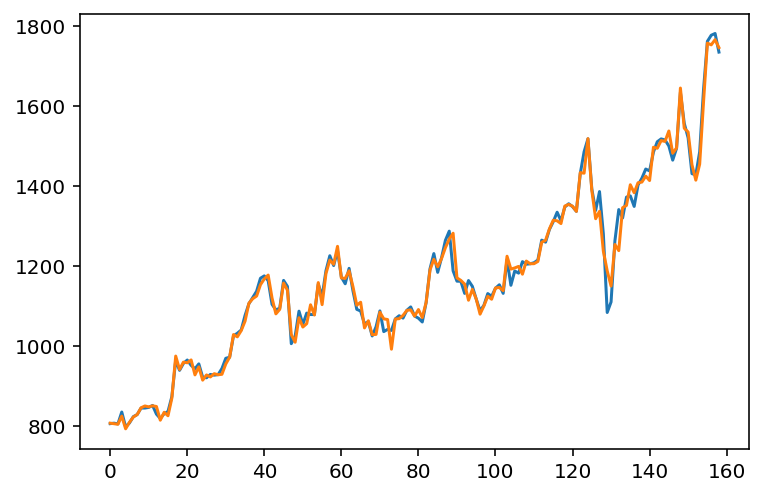

##############################
########## FACEBOOK ##########
##############################



22/06/20 13:17:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


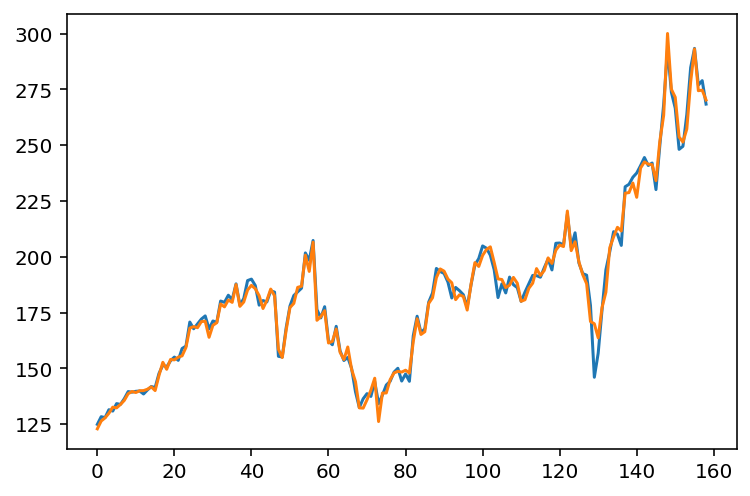

############################
########## AMAZON ##########
############################



22/06/20 13:17:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


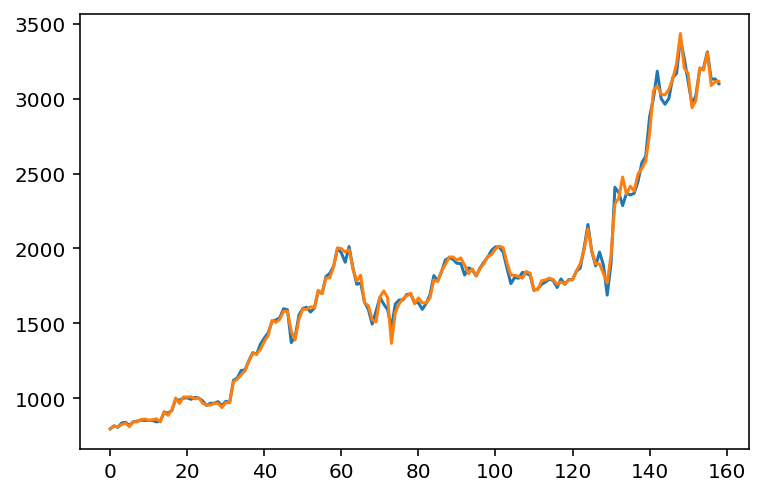

###########################
########## APPLE ##########
###########################



22/06/20 13:17:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


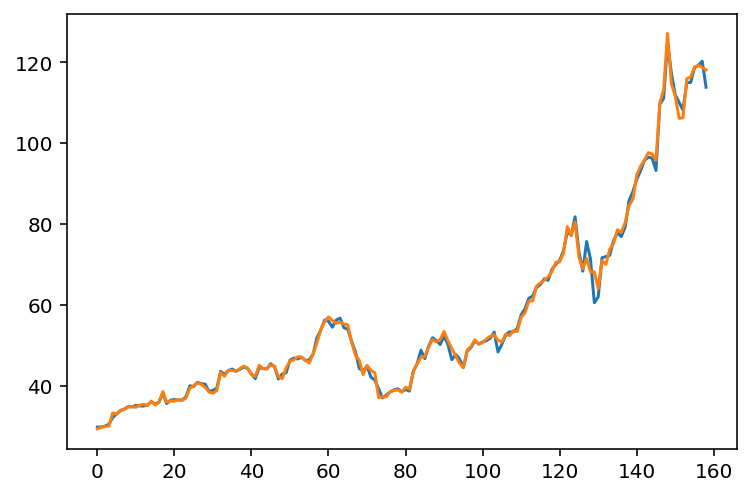

###########################
########## TESLA ##########
###########################



22/06/20 13:17:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


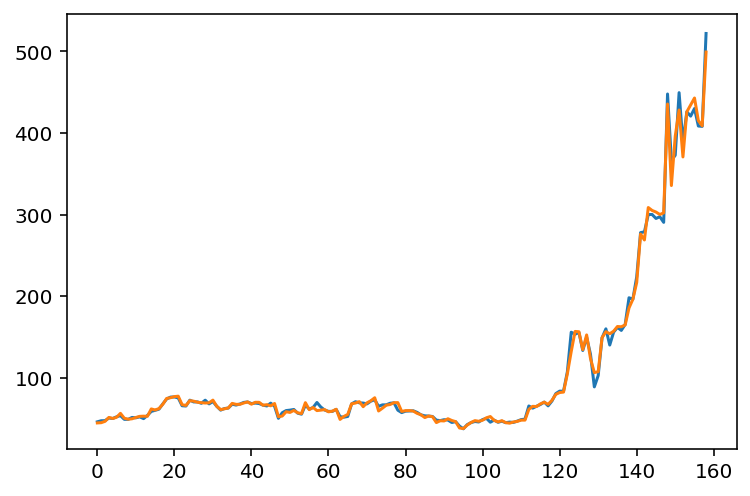

###############################
########## MICROSOFT ##########
###############################



22/06/20 13:17:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


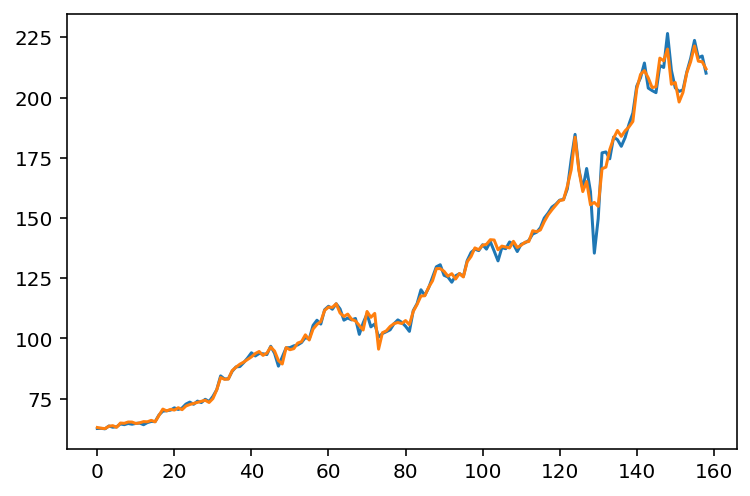

##########################
########## ZOOM ##########
##########################



22/06/20 13:17:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


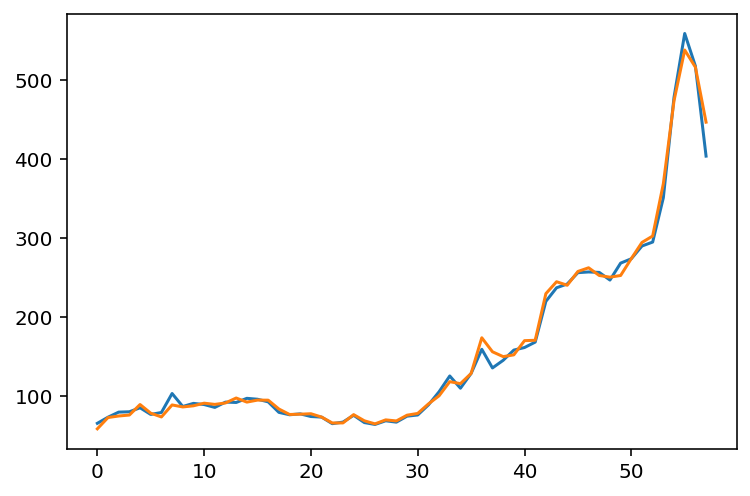

In [8]:
stocks.call_prediction_function("plot_linear_regression")

Percent of good prediction of up/down:

In [9]:
stocks.call_prediction_function("percent_good_up_down")

############################
########## GOOGLE ##########
############################



22/06/20 13:17:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Percent of good prediction of UP/DOWN : 0.5849056603773585%
##############################
########## FACEBOOK ##########
##############################



22/06/20 13:17:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Percent of good prediction of UP/DOWN : 0.5283018867924528%
############################
########## AMAZON ##########
############################



22/06/20 13:17:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:53 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:53 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Percent of good prediction of UP/DOWN : 0.5974842767295597%
###########################
########## APPLE ##########
###########################



22/06/20 13:17:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Percent of good prediction of UP/DOWN : 0.49056603773584906%
###########################
########## TESLA ##########
###########################



22/06/20 13:17:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Percent of good prediction of UP/DOWN : 0.5660377358490566%
###############################
########## MICROSOFT ##########
###############################



22/06/20 13:17:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Percent of good prediction of UP/DOWN : 0.5723270440251572%
##########################
########## ZOOM ##########
##########################



22/06/20 13:17:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:17:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Percent of good prediction of UP/DOWN : 0.5172413793103449%


Plot how much we won/lost:

############################
########## GOOGLE ##########
############################



22/06/20 13:18:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

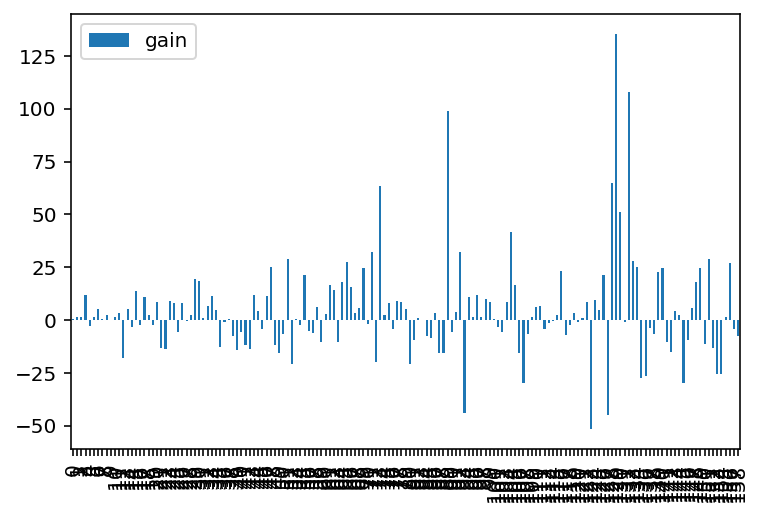

##############################
########## FACEBOOK ##########
##############################



22/06/20 13:18:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

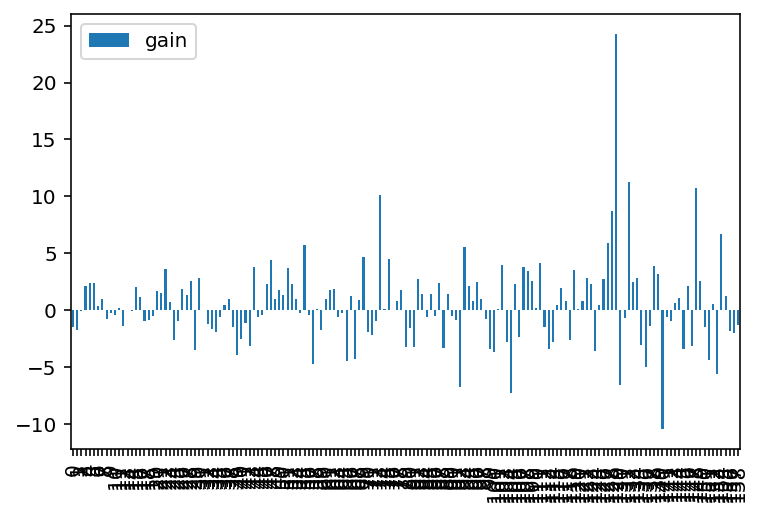

############################
########## AMAZON ##########
############################



22/06/20 13:18:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

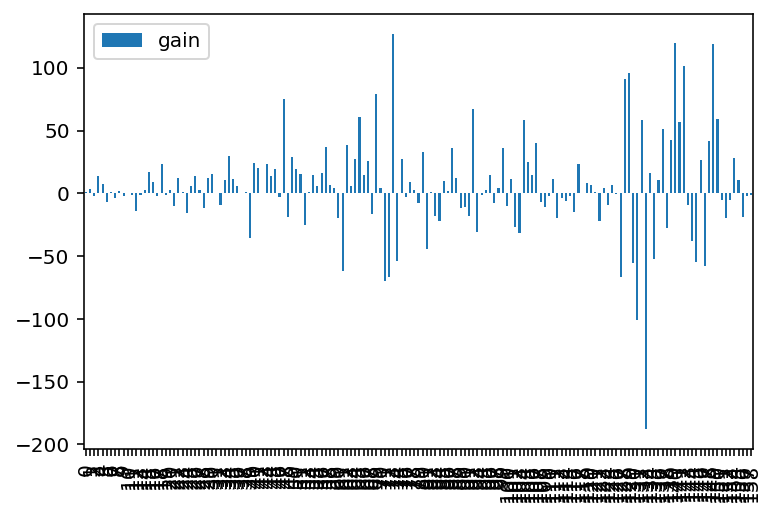

###########################
########## APPLE ##########
###########################



22/06/20 13:18:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

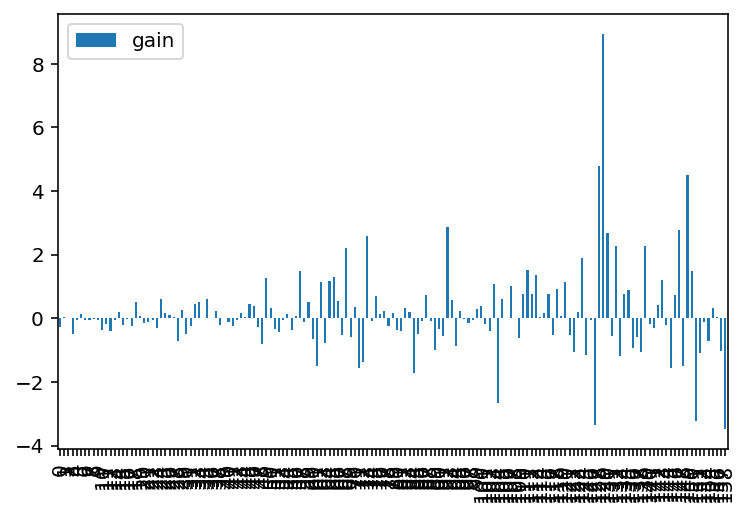

###########################
########## TESLA ##########
###########################



22/06/20 13:18:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

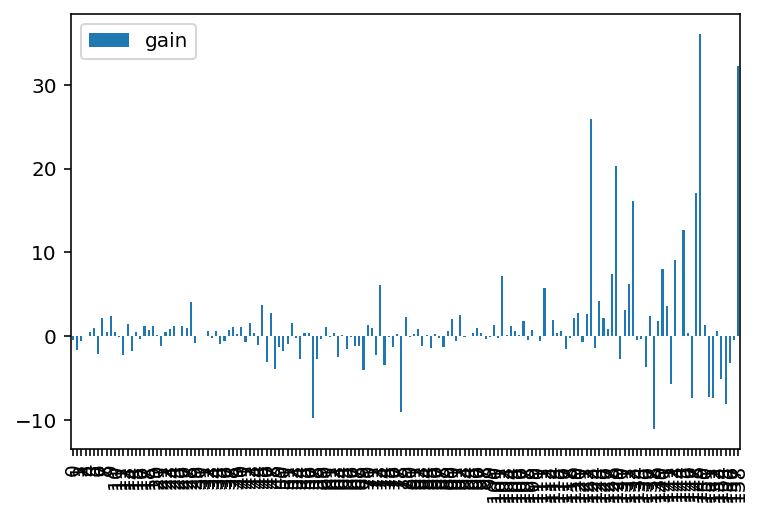

###############################
########## MICROSOFT ##########
###############################



22/06/20 13:18:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

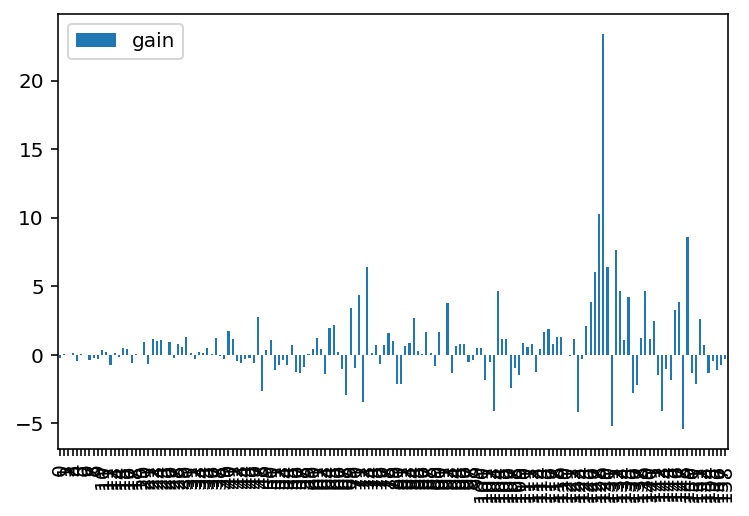

##########################
########## ZOOM ##########
##########################



22/06/20 13:18:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Figure size 2160x720 with 0 Axes>

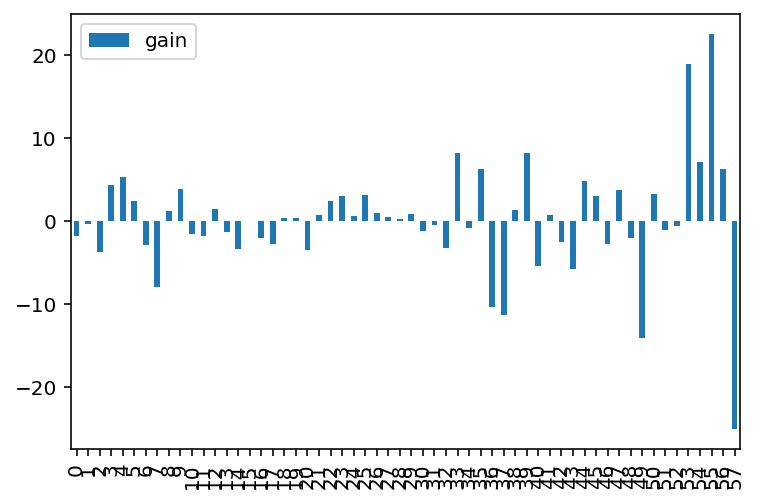

In [10]:
stocks.call_prediction_function("plot_gain_predict")

Print how much we made:

In [11]:
stocks.call_prediction_function("print_stonks_or_not")

############################
########## GOOGLE ##########
############################



22/06/20 13:18:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


With an initial buy at 806.1500244140625$ we won 672.0946044921875$
##############################
########## FACEBOOK ##########
##############################



22/06/20 13:18:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


With an initial buy at 123.41000366210938$ we won 67.30994415283203$
############################
########## AMAZON ##########
############################



22/06/20 13:18:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


With an initial buy at 795.989990234375$ we won 824.2392578125$
###########################
########## APPLE ##########
###########################



22/06/20 13:18:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


With an initial buy at 29.477500915527344$ we won 22.167495727539062$
###########################
########## TESLA ##########
###########################



22/06/20 13:18:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


With an initial buy at 45.801998138427734$ we won 156.02798461914062$
###############################
########## MICROSOFT ##########
###############################



22/06/20 13:18:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


With an initial buy at 62.84000015258789$ we won 94.32000732421875$
##########################
########## ZOOM ##########
##########################



22/06/20 13:18:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/06/20 13:18:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


With an initial buy at 63.20000076293945$ we won 8.56991958618164$
